<a href="https://colab.research.google.com/github/rodrigopbbr/aprendizado_de_maquina/blob/main/roc_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# biblioteca para manipulação de dados
import pandas as pd
# biblioteca para operações matemáticas
import numpy as np
# biblioteca para operações aleatórias
import random
# biblioteca para separação dos dados em treinamento e teste
from sklearn.model_selection import train_test_split
# biblioteca para carregar arquivos (e.g. csv)
from google.colab import files
# biblioteca para executar o DT
from sklearn.tree import DecisionTreeClassifier
# biblioteca para executar o Naive Bayes
from sklearn.naive_bayes import GaussianNB
# biblioteca para rodar a validação cruzada
# biblioteca para executar o knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#biblioteca de gráfico
import matplotlib.pyplot as plt
# bilbioteca para plotar a árvore
from sklearn.tree import plot_tree
# biblioteca com métricas que serão utilizadas pela curva roc
from sklearn import metrics
# biblioteca de pré-processamento
from sklearn import preprocessing

In [ ]:
### você pode usar o código abaixo para carregar qualquer conjunto de dados
### para testar, não esqueça de descomentar a linha abaixo (remover o #)
### para praticar, faça upload do conjunto de dados "iris.csv" 
###    compartilhado pelo professor
files.upload()

Saving cancer.csv to cancer (2).csv


{'cancer.csv': b'class,time,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal dimension_se,radius_wrst,texture_wrst,perimeter_wrst,area_wrst,smoothness_wrst,compactness_wrst,concavity_wrst,concave points_wrst,symmetry_wrst,fractal dimension_wrst,tumor size,lymph node status\nN,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.89,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5\nN,61,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3,2\nN,116,21.37,17.44,137.5,1373,0.08836,0.1189,0.1255,0.0818,0.2333,0.0601,0.5854,0.6105,3.928,82.15,0.006167,0.03449,

In [ ]:
# carregando o conjunto de dados iris (https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)
dataset = pd.read_csv('cancer.csv')
#dataset = pd.read_csv('biodiversity-br.csv')
# visualizando parte dos dados
dataset

,class,time,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal dimension_se,radius_wrst,texture_wrst,perimeter_wrst,area_wrst,smoothness_wrst,compactness_wrst,concavity_wrst,concave points_wrst,symmetry_wrst,fractal dimension_wrst,tumor size,lymph node status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,0


In [ ]:
rotulo = 'class'

# transformado o rótulo se não numérico
if type(dataset[rotulo][0]) is not int:
  conv_rotulo= preprocessing.LabelEncoder()
  conv_rotulo.fit(dataset[rotulo])
  dataset[rotulo] = conv_rotulo.transform(dataset[rotulo])

# separando o rótulo Species (Aprendizado de Máquina Supervisionado) dos demais atributos: y
y = dataset[rotulo]
dataset = dataset.drop([rotulo], axis = 1)

0      0
1      0
2      0
3      0
4      1
      ..
193    0
194    0
195    0
196    1
197    0
Name: class, Length: 198, dtype: int64

In [ ]:
# dividindo o conjunto de dados em treinamento e teste
# test_size informa qual o percentual de dados que vamos usar no teste
# neste exemplo estamos usando 10% (0.1)
X_train,X_test,y_train,y_test = train_test_split(dataset, y, test_size=0.1)

In [ ]:
# usando árvore
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)

In [ ]:
# usando naive
clf_naive = GaussianNB(var_smoothing = 0.1)
clf_naive.fit(X_train, y_train)
y_pred_naive = clf_naive.predict(X_test)

In [ ]:
# usando o knn
clf_knn = KNeighborsClassifier(n_neighbors = 7)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

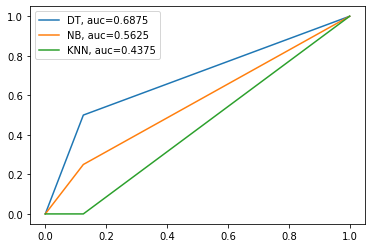

In [ ]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_tree)
auc = metrics.roc_auc_score(y_test, y_pred_tree)
plt.plot(fpr,tpr,label="DT, auc="+str(round(auc, 4)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_naive)
auc = metrics.roc_auc_score(y_test, y_pred_naive)
plt.plot(fpr,tpr,label="NB, auc="+str(round(auc, 4)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_knn)
auc = metrics.roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr,tpr,label="KNN, auc="+str(round(auc, 4)))

plt.legend(loc=0)

In [ ]:
# trabalhando com a curva roc nos folds

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay

In [ ]:
def plot_roc_cv(classifier, X, y, fig_size, cv):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots(figsize = (fig_size,fig_size))
  for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
    classifier,
    X.iloc[test],
    y.iloc[test],
    name="ROC cv-fold {}".format(i),
    alpha=0.3,
    lw=1,
    ax=ax,
    )
  interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs.append(viz.roc_auc)

  ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", 
          label="Aleatório", alpha=0.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = metrics.auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"ROC Média (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
  )

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
  )

  ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Exemplo Curva ROC",
  )
  ax.legend(loc="lower right")
  plt.show()

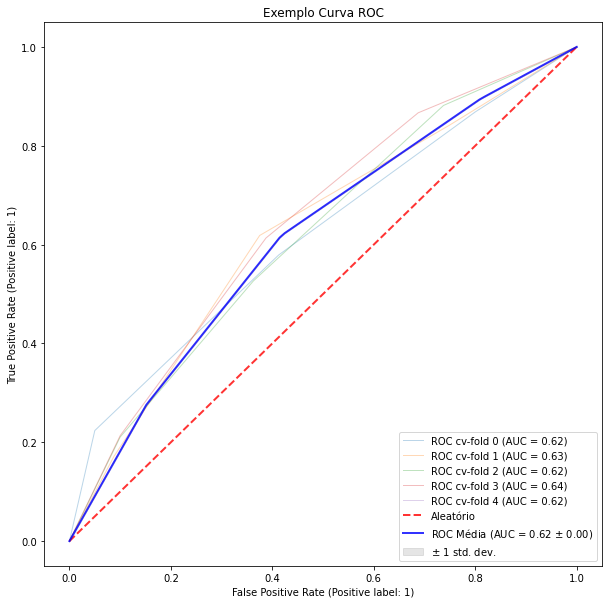

In [ ]:
cv = StratifiedKFold(n_splits=5)
clf_knn = KNeighborsClassifier(n_neighbors = 3)
plot_roc_cv(clf_knn, X_train, y_train, 10, cv)